<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Insurance_data_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Insurance Linear Regression** ❤

- supervised learning algorithm(giving both input and output)
- used for predicting continuous values
- finds a straight-line relationship between independent and dependent variables

In [2]:
# Datatset Link: https://drive.google.com/file/d/1OlGpFxRfkaz94MM2kRIV23gQK2GFbSnx/view?usp=sharing

In [3]:
#1. Download the dataset
#2. Go to the files icon -> Upload -> Select the dataset
#3. Importing Libraries
#4. Uploading the dataset into a variable (Paste the path of the dataset)

In [49]:
import numpy as np                 # for numerical operations
import pandas as pd                # for data manipulation and analysis
import matplotlib.pyplot as plt    # for basic plotting
import seaborn as sns              # for advanced visualizations
import warnings
warnings.filterwarnings('ignore')  # to suppress warning messages

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
# Upload csv file
df=pd.read_csv('/content/new_insurance_data (1).csv')

In [6]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [7]:
# Getting detailed information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [9]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else :
    df[col] = df[col].fillna(df[col].mean())

In [10]:
# df.dropna(inplace = True)

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace = True)


In [14]:
# ouitlier : extrem value

In [15]:
#scatter plot and histogram pairplot

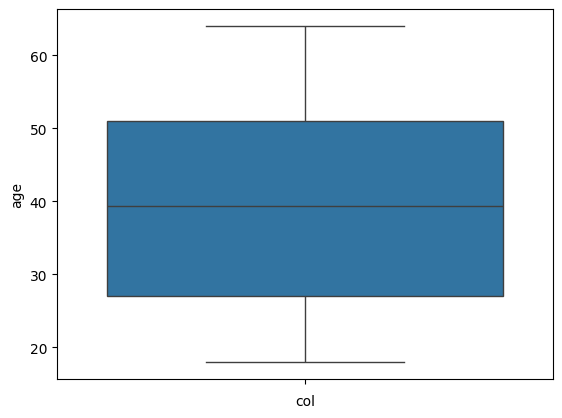

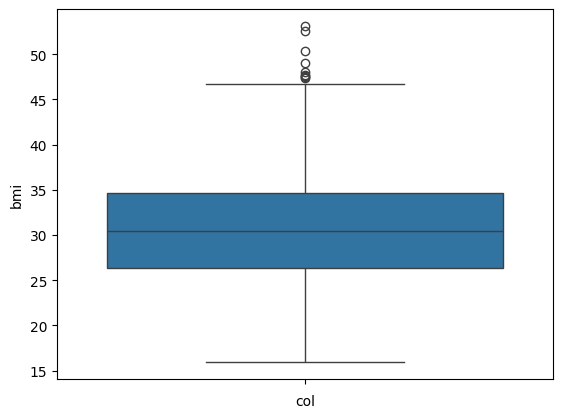

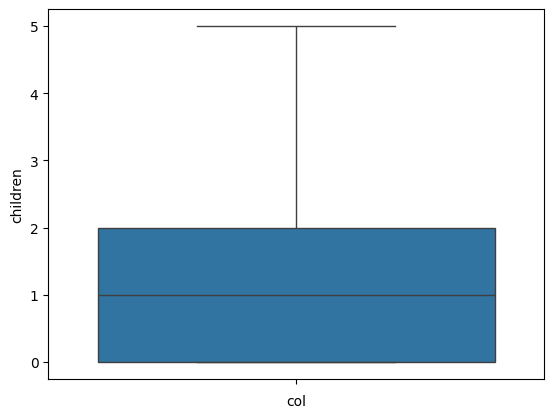

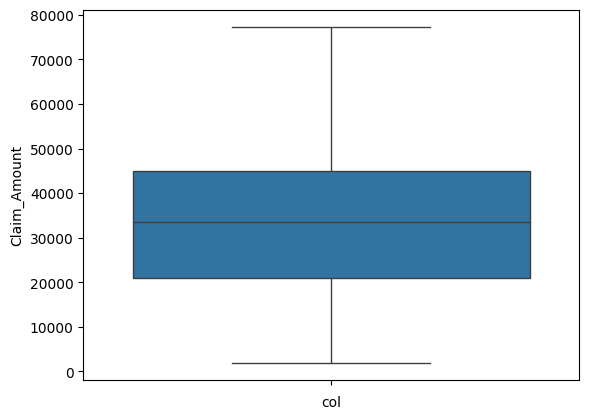

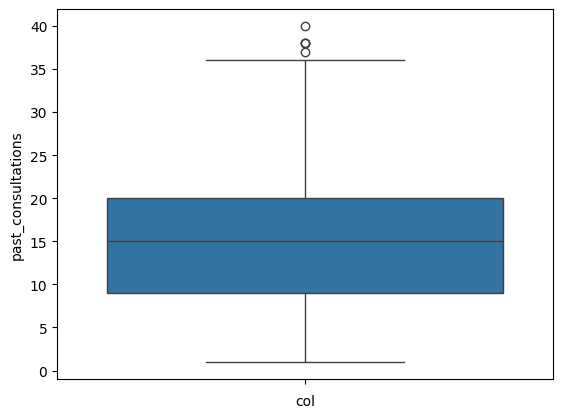

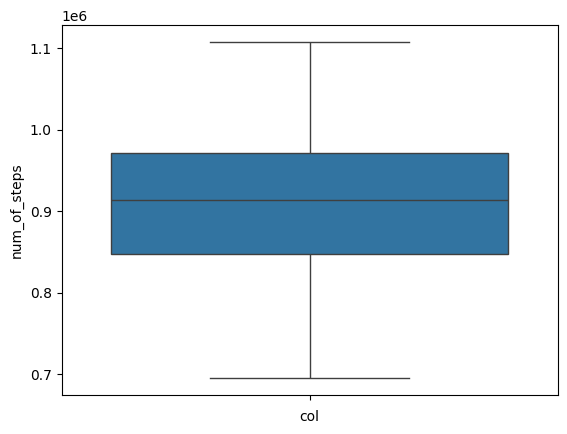

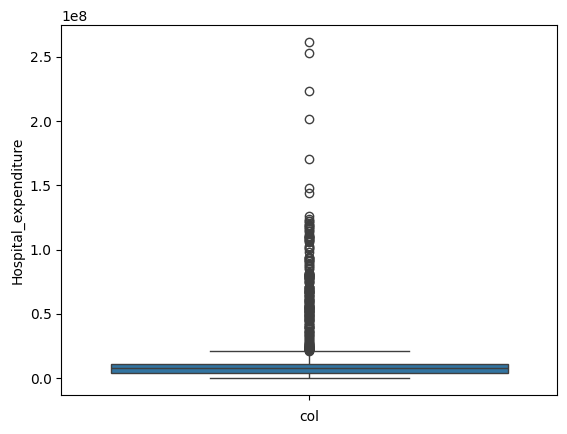

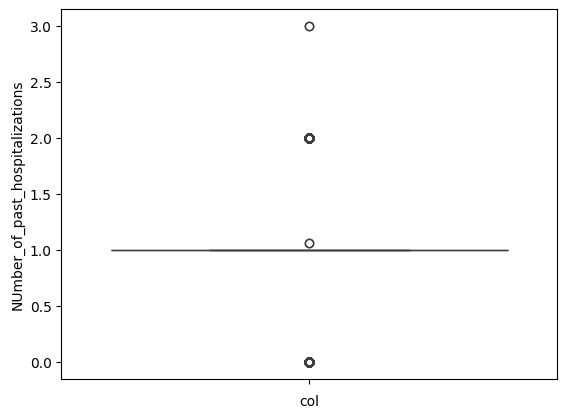

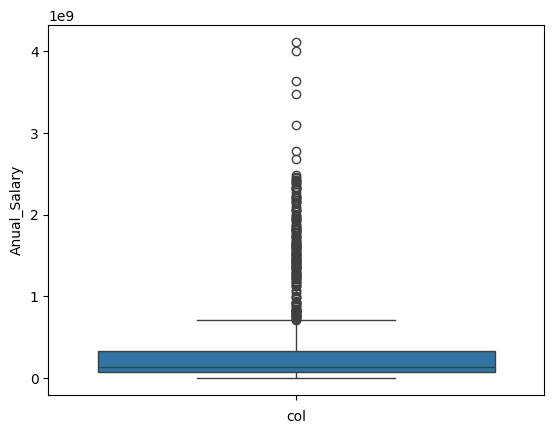

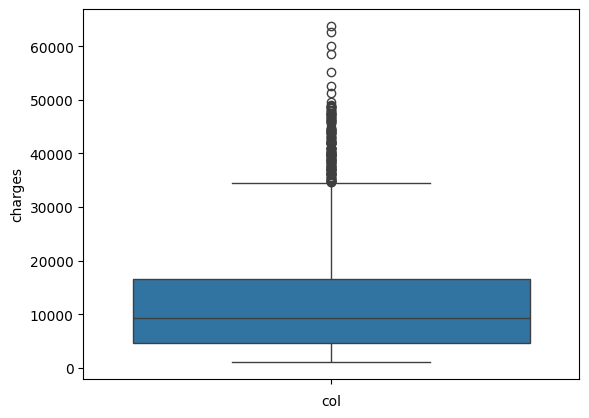

In [16]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.xlabel('col')
    plt.show()

In [17]:
#OUTLIER REMOVAL

outlist=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

for col in outlist:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]


*#Label Encoding : convert object data into numerical data*

In [19]:
le = LabelEncoder()

In [20]:
for col in df.columns:
  if (df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

In [21]:
df.head(10)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.543130,17.0,715428.00000,4.720921e+06,0.0,5.578497e+07,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.674370,7.0,699157.00000,4.329832e+06,0.0,1.370089e+07,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.627590,19.0,702341.00000,6.884861e+06,0.0,7.352311e+07,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.393320,11.0,700250.00000,4.274774e+06,0.0,7.581968e+07,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.859410,16.0,711584.00000,3.787294e+06,0.0,2.301232e+07,2,1137.0110
5,18.0,1,34.43,0.0,0,26488.339120,20.0,717162.00000,3.696161e+06,0.0,3.696849e+08,2,1137.4697
6,18.0,1,37.29,0.0,0,33217.365480,13.0,699159.00000,8.765292e+05,0.0,6.906067e+07,2,1141.4451
7,18.0,1,41.14,0.0,0,46770.585330,12.0,706423.00000,4.486741e+06,0.0,9.719378e+07,2,1146.7966
8,18.0,1,43.01,0.0,0,9715.650411,17.0,910004.69588,9.216440e+06,0.0,5.888197e+07,2,1149.3959
10,19.0,1,19.80,0.0,0,16980.214030,2.0,706796.00000,4.981703e+06,0.0,7.007611e+07,3,1241.5650


# **Model building**

1. splitting the data into x(features/independent) and y(target/dependent)
2. splitting the data into TRAINING and TESTING SET
3. Model Initialization
4. Train the model
5. Prediction
6. Evaluate

In [22]:
#spliting the data into feature and target columns
x= df.drop(columns = 'charges')
y = df['charges']

In [23]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [24]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [25]:
# spliting the data into traing and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [26]:
x_train.shape

(824, 12)

In [27]:
x_test.shape

(206, 12)

In [28]:
# model initialization
model = LinearRegression()

In [29]:
# Model Training
model.fit(x_train,y_train)

LinearRegression()

# multi linear equation
y = m1x1+m2x2+m3x3+.....+mnxn+c

In [30]:
model.coef_

array([ 3.97643954e+01, -1.22159481e+02, -3.69624881e+00,  2.43314687e+01,
        2.70249841e+03,  1.43816402e-03,  3.47084103e-01,  4.06995305e-02,
        1.56655164e-05, -1.31656277e+03,  1.64666487e-05, -4.16007663e+01])

In [31]:
model.intercept_

np.float64(-30464.748404437894)

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([ 1423.44953761,  1469.96518392,  2687.35820135,  1860.51696794,
       13873.92358645, 18812.69554158, 11543.35626025,  3773.67624268,
        4146.16497042,  8206.40842691, 12768.12348125,  8493.65005496,
         870.23935836,  2697.78700702,  6723.49619896,  8076.1709214 ,
       11686.63770707,  8929.32575587, 10823.93302395,  6114.08005374,
        7811.06330036,  5793.08214339,  5113.65300923,  8382.34158888,
        5318.7205309 ,  4773.43580051,  9196.14451051, 13508.55342178,
        7237.66485312,  8116.66000944,  6007.29455456,  7509.47120411,
       10537.79783051,  5865.80293039,  5651.94634007,   863.60947203,
        4290.48959471, 13722.54851423,  8903.65131991,  4467.14058062,
        9143.0079089 ,  9833.13765007, -1614.95001047,  8698.02383454,
        3456.21902837,  3616.26963888,  5463.17288396,  9763.9511499 ,
       11785.36516149, 10600.15362028, 12370.82540118,  9822.50735366,
       12723.1178182 ,  8368.49874866,  4867.99423005,   493.37613335,
      

In [34]:
result = pd.DataFrame({'Actual': y_test,
                       'Predict': y_pred})


In [43]:
result

,Actual,Predict
32,1629.8335,1423.449538
110,2155.6815,1469.965184
137,2396.0959,2687.358201
89,1981.5819,1860.516968
924,13430.2650,13873.923586
...,...,...
484,6746.7425,6300.388375
547,7537.1639,7373.631254
111,2156.7518,3277.147169
516,7162.0122,6673.898228


In [47]:
print(f'r2score {r2_score(y_test,y_pred)*100:.2f}')

r2score 96.95


In [50]:
# Now check how much accurately it predicted

r2 = r2_score(y_test, y_pred)
print(f"R2 Score is : {r2 * 100:.2f} %")

MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is : {MSE}")

MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is : {MAE}")

R2 Score is : 96.95 %
Mean Squared Error is : 615024.3512192704
Mean Absolute Error is : 602.048619984252


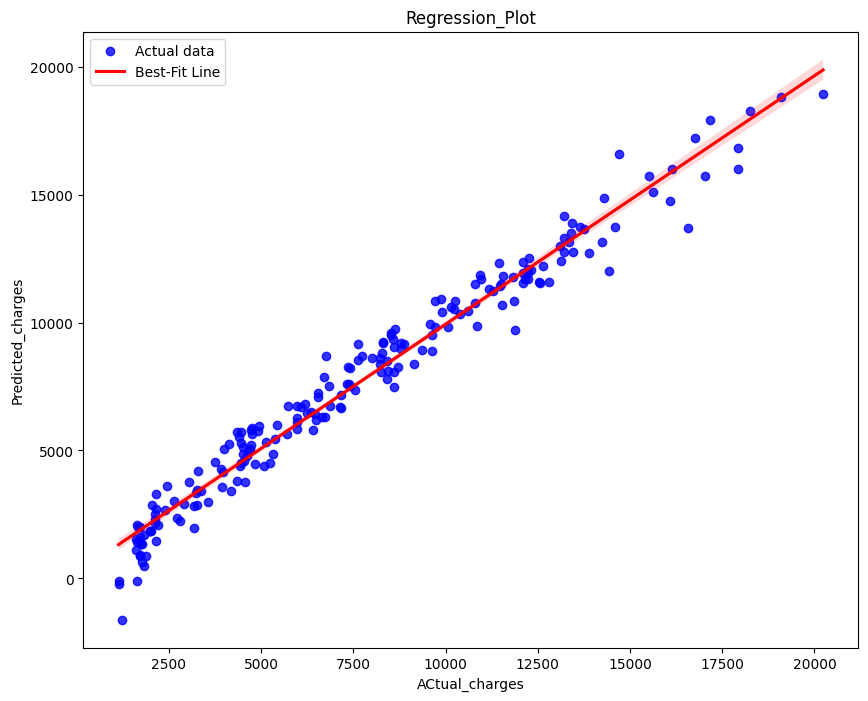

In [61]:
plt.figure(figsize = (10,8))
sns.regplot(x = y_test, y = y_pred, line_kws={'color':'red', 'label':'Best-Fit Line'}, scatter_kws={'color':'blue'},label = 'Actual data')
plt.xlabel('ACtual_charges')
plt.ylabel('Predicted_charges')
plt.title('Regression_Plot')
plt.legend()
plt.show()

# **Conclusion** :

**Data Preparation**: Missing values were handled using mean (for numerical) and mode (for categorical) imputation, and outliers were removed from key numerical columns.

**Feature Transformation**: Categorical variables like 'sex', 'smoker', and 'region' were converted into numerical format using Label Encoding.

**Model Building**: A Linear Regression model was initialized and trained on the preprocessed data, splitting it into training and testing sets.

**High Accuracy**: The model achieved a high R-squared score of approximately 96.95%, indicating that it explains a significant portion of the variance in 'charges'.

**Visual Confirmation**: A regression plot visually confirmed the strong correlation between actual and predicted charges.